### This notebook is to explore test dataset categorical

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from pprint import pprint
from feature_engine import missing_data_imputers as mdi

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('testoriginal.csv')

In [3]:
df.head()

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,8e7613e,9d1e27d,52842.0,5403.0,26.840,NaN,27.960,0.924234,0.025049,0.034351,0.001978,0.002308,0.000000,0.012080,0.000000,11.469,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Nonspecialized,0.436,0.075,0.218,0.057,0.284,0.257,0.114,0.080,0.048,0.332,13.194028,3.31,19.83,293,4880.0,2710.0,0.512,0.215,0.177,0.174651,0.395210,0.274451,0.155689,9.828291,10.628268
1,1,694a5e8,a952566,212287.0,53502.0,57.534,6032.0,33.072,0.398318,0.484635,0.063760,0.001394,0.021801,0.000199,0.028500,0.001394,19.170,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Federal/State government-dependent,0.524,0.062,0.225,0.058,0.282,0.187,0.097,0.120,0.164,0.252,12.419433,26.93,10.83,308,850.0,1009.0,0.522,0.192,0.113,0.168327,0.230080,0.241036,0.360558,13.285546,8.818293
2,2,b3f0726,20d32fc,81263.0,13368.0,39.994,1012.0,32.044,0.483789,0.381916,0.099035,0.002509,0.009255,0.000800,0.018710,0.003988,17.408,"Nonmetro - Urban population of 20,000 or more,...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.464,0.094,0.250,0.081,0.349,0.121,0.137,0.099,NaN,0.308,11.877446,10.26,23.25,269,2980.0,2459.0,0.526,0.240,0.153,0.201816,0.329970,0.287588,0.180626,11.571830,10.136089
3,3,fd922f0,1b0d913,122870.0,19359.0,41.865,NaN,30.724,0.468043,0.088393,0.368847,0.003210,0.046383,0.002206,0.021934,0.000984,18.560,"Metro - Counties in metro areas of 250,000 to ...",Small-in a metro area with fewer than 1 millio...,Nonspecialized,0.468,0.040,0.368,0.148,0.339,0.226,0.100,0.099,0.150,0.320,9.826327,8.25,21.27,340,2259.0,1240.0,0.491,0.282,0.111,0.239563,0.277336,0.333996,0.149105,17.191860,10.089273
4,4,3bd551e,698ab34,146153.0,15766.0,30.681,644.0,30.860,0.651511,0.251317,0.047687,0.005197,0.016952,0.000900,0.025737,0.000700,10.460,"Metro - Counties in metro areas of 250,000 to ...",Small-in a metro area with fewer than 1 millio...,Nonspecialized,0.470,0.058,0.211,0.084,0.290,0.191,0.104,0.090,0.153,0.246,12.530045,5.30,16.52,263,1919.0,2509.0,0.516,0.259,0.108,0.100100,0.289289,0.360360,0.250250,12.463880,6.432751


In [4]:
df.tail()

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
1571,1571,dae1584,52acab4,44414.0,6275.0,35.026,254.0,30.569,0.726121,0.019125,0.054938,0.143854,0.005045,0.000301,0.050415,0.000201,13.606,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a small metro area,Nonspecialized,0.401,0.048,0.300,0.131,0.333,0.259,0.117,0.08,0.091,0.297,10.200021,5.67,25.89,330,2779.0,2530.0,0.511,0.233,0.165,0.158683,0.332335,0.295409,0.213573,13.675599,11.802539
1572,1572,b95e0ba,485e9af,16160.0,1871.0,31.922,NaN,33.899,0.663196,0.303469,0.015262,0.001817,0.001717,0.000000,0.004257,0.010282,20.052,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.450,0.059,0.254,0.062,0.355,0.195,0.111,0.10,NaN,0.333,10.897362,NaN,30.34,347,8620.0,8160.0,0.495,0.227,0.176,0.210159,0.419323,0.240040,0.130478,10.286142,13.278474
1573,1573,f44348c,1dcfd4e,28688.0,4478.0,33.897,NaN,28.644,0.809853,0.011596,0.147624,0.001816,0.009389,0.003832,0.005427,0.010463,6.418,"Nonmetro - Urban population of 20,000 or more,...",Micropolitan not adjacent to a metro area,Recreation,0.696,0.034,0.231,0.132,0.144,0.096,0.039,0.11,0.331,0.117,12.726635,NaN,10.74,78,1229.0,959.0,0.451,0.170,0.094,0.051793,0.173307,0.288845,0.486056,9.229493,2.385150
1574,1574,c9450a6,52acab4,29234.0,4528.0,40.479,57.0,24.803,0.707838,0.030869,0.160475,0.025157,0.014104,0.000700,0.060857,0.000000,12.429,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan not adjacent to a metro area,Mining-dependent,0.532,0.031,0.286,0.133,0.287,0.161,0.108,0.08,0.107,0.335,9.967003,NaN,18.86,349,2139.0,1849.0,0.501,0.237,0.131,0.137412,0.350050,0.243731,0.268806,16.695002,9.758586
1575,1575,c229ad2,78e8330,4036.0,327.0,18.052,NaN,22.122,0.967377,0.001192,0.012517,0.013282,0.003944,0.000000,0.001689,0.000000,6.621,"Nonmetro - Completely rural or less than 2,500...",Micropolitan not adjacent to a metro area,Farm-dependent,0.562,0.025,0.158,0.074,0.358,0.130,0.089,NaN,0.202,0.295,9.667330,NaN,NaN,260,NaN,NaN,0.489,0.236,0.217,0.110000,0.338000,0.311000,0.241000,10.982154,7.487832


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576 entries, 0 to 1575
Data columns (total 45 columns):
row_id                                        1576 non-null int64
county_code                                   1576 non-null object
state                                         1576 non-null object
population                                    1576 non-null float64
renter_occupied_households                    1576 non-null float64
pct_renter_occupied                           1576 non-null float64
evictions                                     1263 non-null float64
rent_burden                                   1576 non-null float64
pct_white                                     1576 non-null float64
pct_af_am                                     1576 non-null float64
pct_hispanic                                  1576 non-null float64
pct_am_ind                                    1576 non-null float64
pct_asian                                     1576 non-null float64
pct_nh_pi    

In [6]:
df.describe(include='all')

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,rucc,urban_influence,economic_typology,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
count,1576.000000,1576,1576,1.576000e+03,1576.000000,1576.000000,1263.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576,1576,1576,1576.000000,1576.000000,1573.000000,1573.000000,1573.000000,1361.000000,1573.000000,1466.000000,1119.000000,1573.000000,1563.000000,637.000000,1399.000000,1576.000000,1470.000000,1485.000000,1573.000000,1573.000000,1573.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
unique,NaN,1576,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,12,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,26a9bee,1b0d913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nonmetro - Urban population of 2,500 to 19,999...",Small-in a metro area with fewer than 1 millio...,Nonspecialized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291,374,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,787.500000,NaN,NaN,9.335925e+04,13026.646574,28.604343,330.127474,28.491293,0.777703,0.089202,0.084696,0.015787,0.012361,0.000833,0.018565,0.000852,12.223749,NaN,NaN,NaN,0.472693,0.062339,0.215020,0.085459,0.306643,0.213584,0.107628,0.083731,0.165150,0.279910,11.616655,5.794270,21.381094,278.209391,3517.072109,2619.026263,0.500537,0.228711,0.167240,0.145707,0.348718,0.302235,0.203340,11.750982,10.390796
std,455.096327,NaN,NaN,2.620079e+05,43974.207970,8.011919,1171.361516,4.464953,0.193223,0.144440,0.128088,0.064822,0.026029,0.004712,0.018096,0.001599,5.683836,NaN,NaN,NaN,0.074010,0.022760,0.064746,0.038708,0.041216,0.062011,0.022486,0.020926,0.051802,0.052768,1.527349,5.027517,10.104331,59.803588,2785.845176,2312.952925,0.020815,0.031792,0.041578,0.065339,0.070282,0.051146,0.088301,2.561985,2.792358
min,0.000000,NaN,NaN,1.170000e+02,15.000000,9.159000,-1.000000,10.011000,0.063466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.237000,0.013000,0.039000,0.013000,0.131000,0.066000,0.036000,0.040000,0.042000,0.103000,6.965724,-0.340000,3.690000,78.000000,460.000000,190.000000,0.286000,0.102000,0.062000,0.015984,0.119522,0.141994,0.018924,3.929273,1.956947
25%,393.750000,NaN,NaN,1.194450e+04,1219.500000,23.242250,5.000000,26.076000,0.663229,0.005739,0.018686,0.001107,0.002405,0.000000,0.010148,0.000000,8.190750,NaN,NaN,NaN,0.425000,0.047000,0.167000,0.058000,0.284000,0.172000,0.092000,0.070000,0.129000,0.247000,10.447460,2.680000,14.050000,236.000000,1889.250000,1379.000000,0.496000,0.209000,0.140000,0.096952,0.305431,0.265265,0.141470,10.096672,8.533006
50%,787.500000,NaN,NaN,2.655800e+04,2840.500000,27.389000,33.000000,28.728500,0.845921,0.021105,0.037291,0.002546,0.005447,0.000000,0.015126,0.000300,11.520500,NaN,NaN,NaN,0.474000,0.060000,0.214000,0.076000,0.308000,0.209000,0.107000,0.080000,0.162000,0.282000,11.829378,4.600000,19.480000,272.000000,2699.000000,1949.000000,0.505000,0.228000,0.164000

In [7]:
df.shape

(1576, 45)

### Analyse the categorical features

In [8]:
df_cat = df[['row_id','county_code','state','rucc','urban_influence','economic_typology']]

In [9]:
df_cat.head()

,row_id,county_code,state,rucc,urban_influence,economic_typology
0,0,8e7613e,9d1e27d,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Nonspecialized
1,1,694a5e8,a952566,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Federal/State government-dependent
2,2,b3f0726,20d32fc,"Nonmetro - Urban population of 20,000 or more,...",Micropolitan adjacent to a large metro area,Manufacturing-dependent
3,3,fd922f0,1b0d913,"Metro - Counties in metro areas of 250,000 to ...",Small-in a metro area with fewer than 1 millio...,Nonspecialized
4,4,3bd551e,698ab34,"Metro - Counties in metro areas of 250,000 to ...",Small-in a metro area with fewer than 1 millio...,Nonspecialized


In [10]:
df_cat['county_code'].value_counts()

26a9bee    1
ad950e6    1
05dced8    1
481d462    1
4473c40    1
1cd0a92    1
37225b4    1
32de662    1
7798946    1
1dd4ffe    1
58d51d8    1
8e2e0c8    1
c306750    1
76e40e6    1
ae8a62c    1
be76cde    1
8eaa248    1
1e68728    1
4a383aa    1
d1953d2    1
df2ccc6    1
20c4714    1
b85cb98    1
a32180e    1
555707c    1
78527b4    1
551c0ee    1
f01439e    1
caa00d0    1
d1e3d02    1
bed0c84    1
a9c9e38    1
a10171a    1
5c99468    1
af5b05c    1
1e6fcaa    1
4d0a9ec    1
a19456a    1
7e2f6d4    1
2811626    1
2b1edae    1
7632c46    1
da951e6    1
afdd696    1
1812730    1
fd922f0    1
39e5db0    1
35ddd2a    1
d431ff4    1
74b9408    1
bf5e770    1
a048af0    1
70b40a8    1
a761698    1
1f20136    1
4212964    1
7a3c78a    1
62bc4fa    1
2d3edea    1
54947e6    1
0ce9562    1
307f8a2    1
cc6abb2    1
58ee3e4    1
97df298    1
75230d6    1
6956b30    1
eb7960c    1
308c67c    1
edaa25e    1
dc595c8    1
a345296    1
055461e    1
d089b92    1
b0df1a6    1
0785bb4    1
07a1718    1

In [11]:
df_cat['county_code'].nunique()

1576

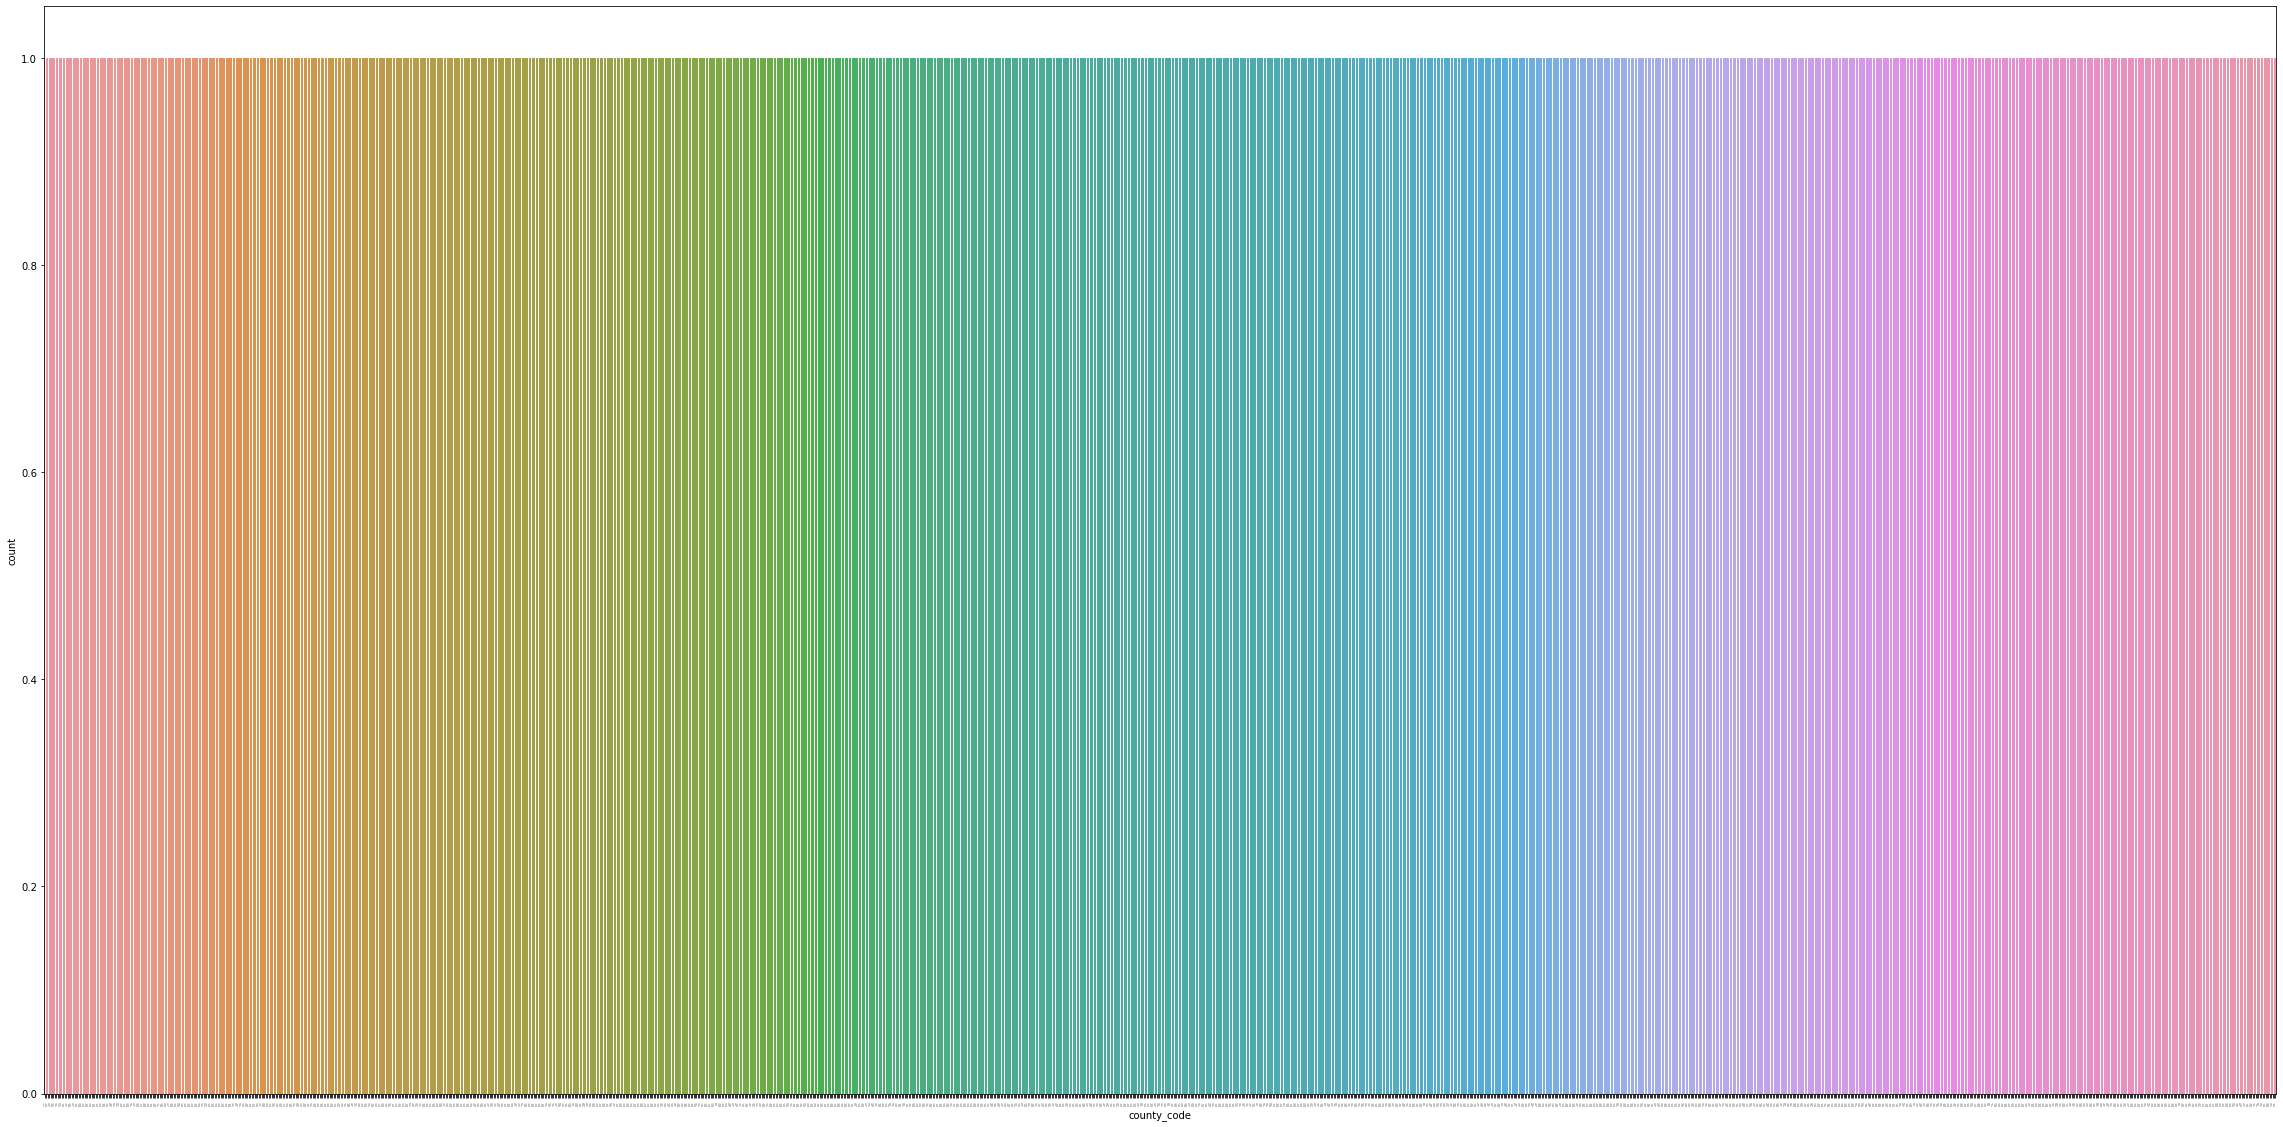

In [12]:
plt.figure(figsize=(40,20))
sns.countplot(x='county_code',data=df_cat)
plt.tick_params(axis='x',which='major',labelsize=1)
plt.xticks(rotation=90)
plt.show()

In [13]:
df_cat['state'].value_counts()

1b0d913    123
4522abc     66
a952566     64
528ea9f     63
08f8fb4     61
dc9ae72     55
e2f94fa     55
158df01     50
9dda412     48
9d1e27d     48
b795815     48
52acab4     46
c479f0c     46
09d8cd0     45
20d32fc     44
9d0874a     43
9e0007d     42
1646cf6     40
485e9af     39
0f8930b     39
e74aca3     36
e899d7f     36
5086a32     34
78e8330     32
1dcfd4e     27
7572db1     27
4c72956     27
698ab34     25
fb8cab1     23
8036085     21
c3dbf0a     21
176f5f0     20
3745933     20
842bd12     18
b44cfe6     18
5029ed4     15
bc77872     14
64ffe5d     14
4cd9667     13
6d287d7     11
fa605d5     10
7dd3518     10
2b7da97      8
dfc21f3      8
375d4d3      8
d233cec      6
914c15f      3
9e065a4      2
3337bbb      2
105e445      1
a0e0eec      1
Name: state, dtype: int64

In [14]:
df_cat['state'].nunique()

51

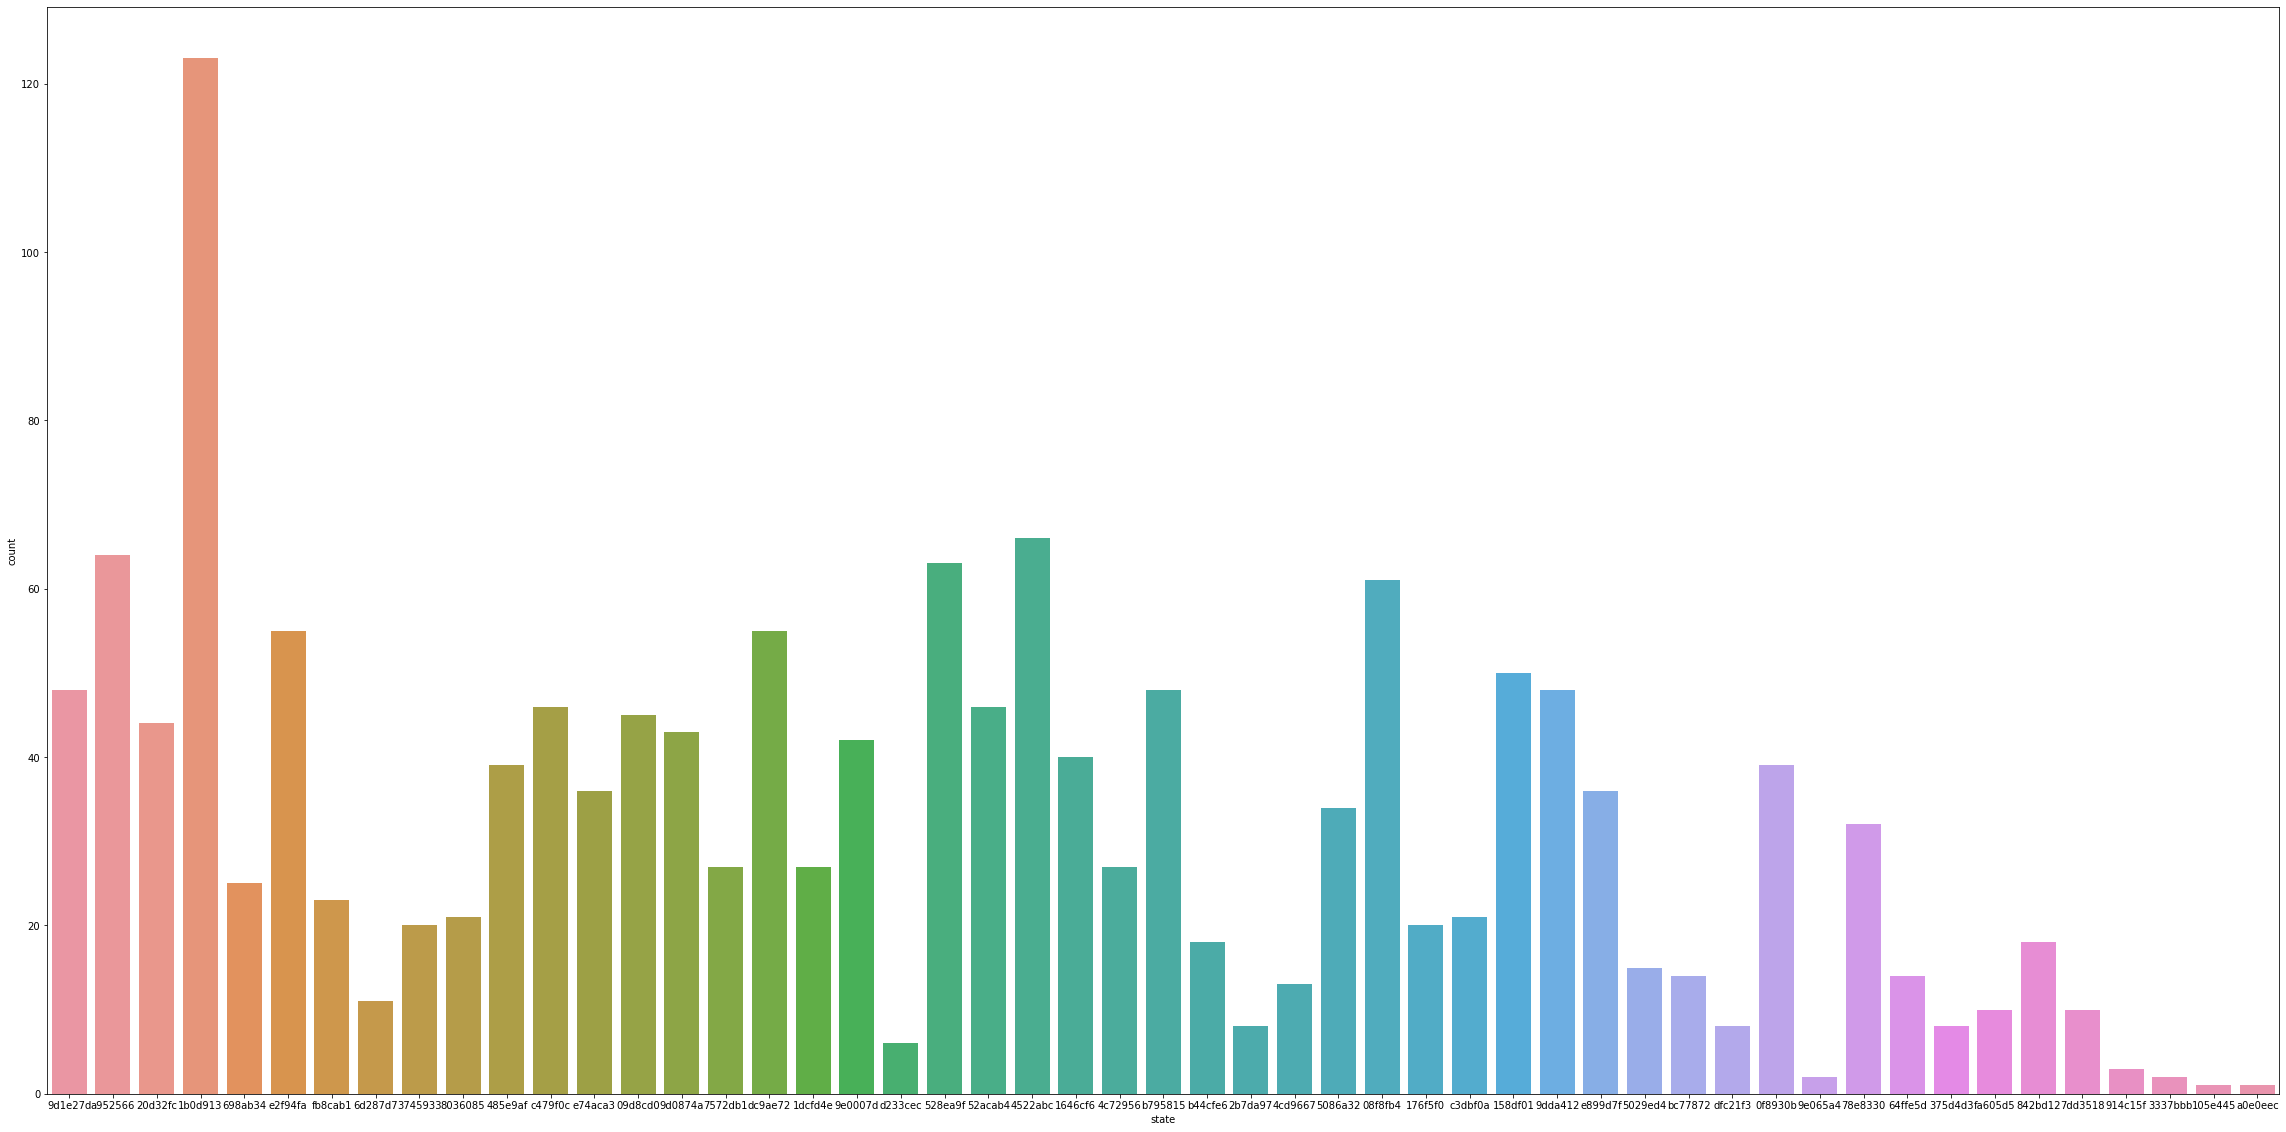

In [15]:
plt.figure(figsize=(40,20))
sns.countplot(x='state',data=df_cat)
plt.show()

In [16]:
df_cat['rucc'].value_counts()

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         291
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     227
Metro - Counties in metro areas of 1 million population or more                                  213
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    208
Metro - Counties in metro areas of fewer than 250,000 population                                 190
Metro - Counties in metro areas of 250,000 to 1 million population                               184
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          113
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        100
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                       50
Name: rucc, dtype: int64

In [17]:
df_cat['rucc'].nunique()

9

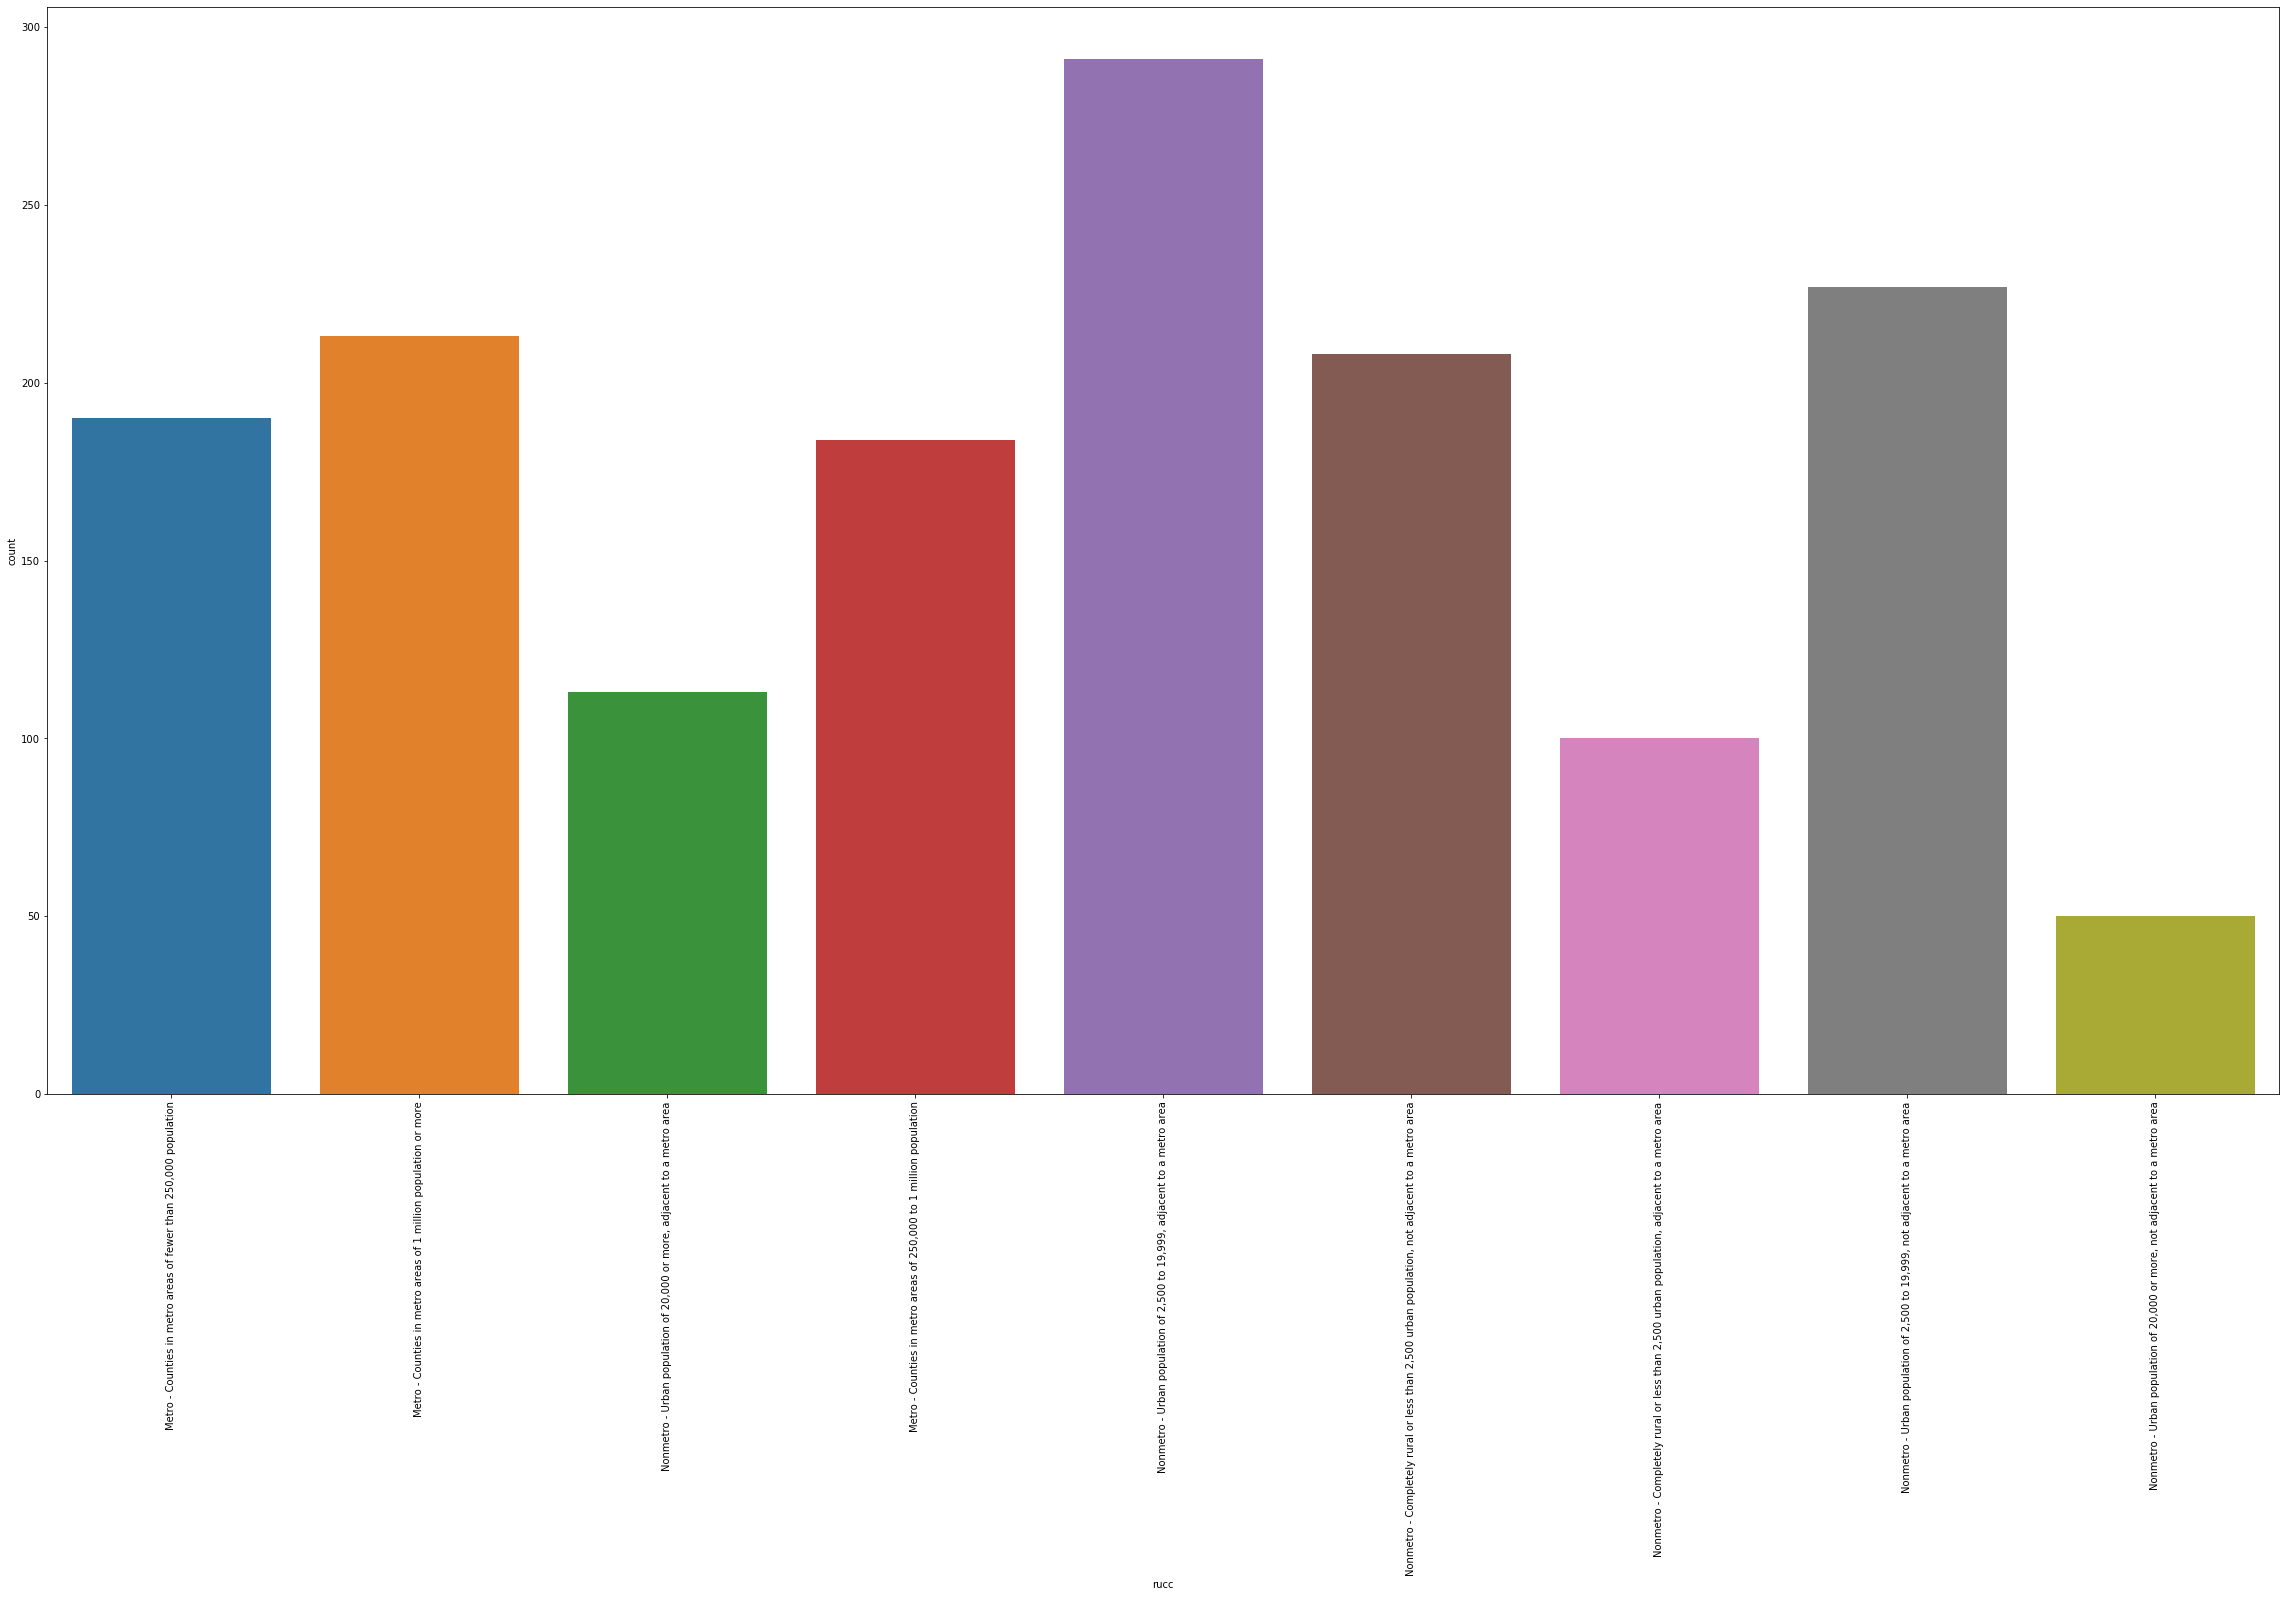

In [18]:
plt.figure(figsize=(40,20))
sns.countplot(x='rucc',data=df_cat)
plt.xticks(rotation=90)
plt.show()

In [19]:
df_cat['urban_influence'].value_counts()

Small-in a metro area with fewer than 1 million residents                                             374
Large-in a metro area with at least 1 million residents or more                                       213
Noncore adjacent to a small metro with town of at least 2,500 residents                               165
Micropolitan not adjacent to a metro area                                                             138
Micropolitan adjacent to a small metro area                                                           129
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                           98
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents     95
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                 92
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents              74
Noncore adjacent to a large metro area        

In [20]:
df_cat['urban_influence'].nunique()

12

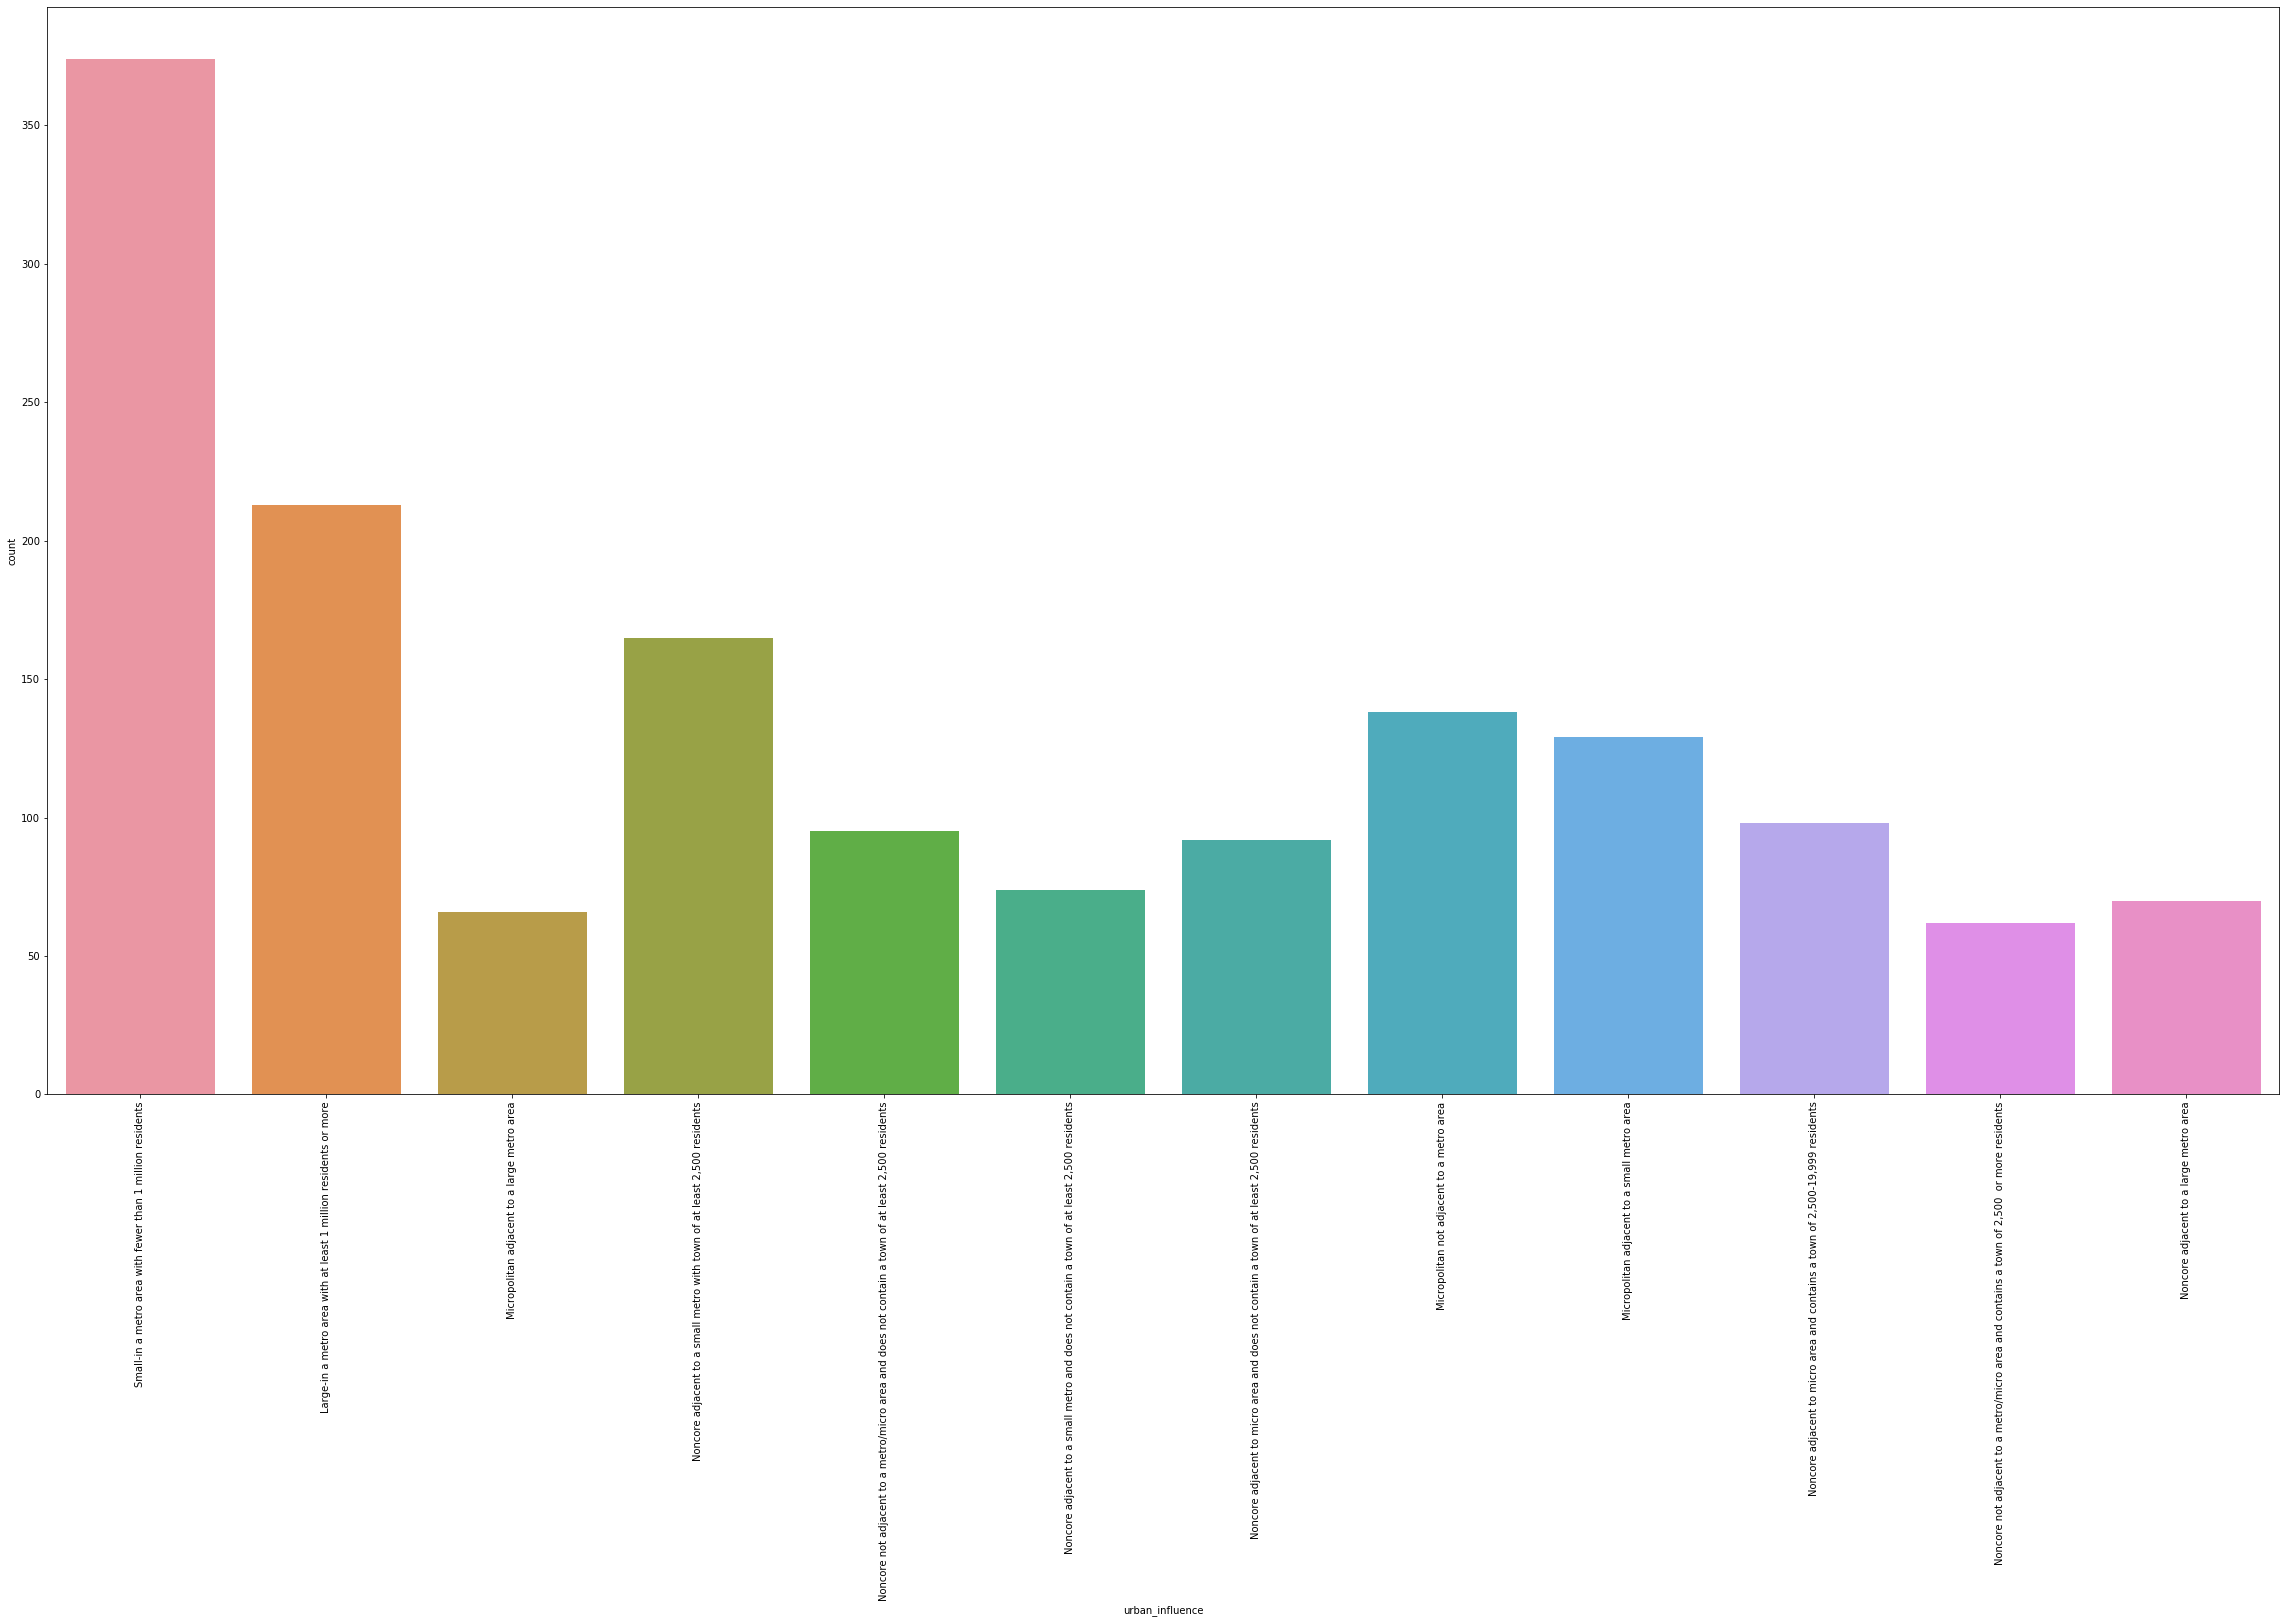

In [21]:
plt.figure(figsize=(40,20))
plt.xticks(rotation=90)
sns.countplot(x='urban_influence',data=df_cat)
plt.show()

In [22]:
df_cat['economic_typology'].value_counts()

Nonspecialized                        603
Manufacturing-dependent               262
Farm-dependent                        227
Federal/State government-dependent    213
Recreation                            165
Mining-dependent                      106
Name: economic_typology, dtype: int64

In [23]:
df_cat['economic_typology'].nunique()

6

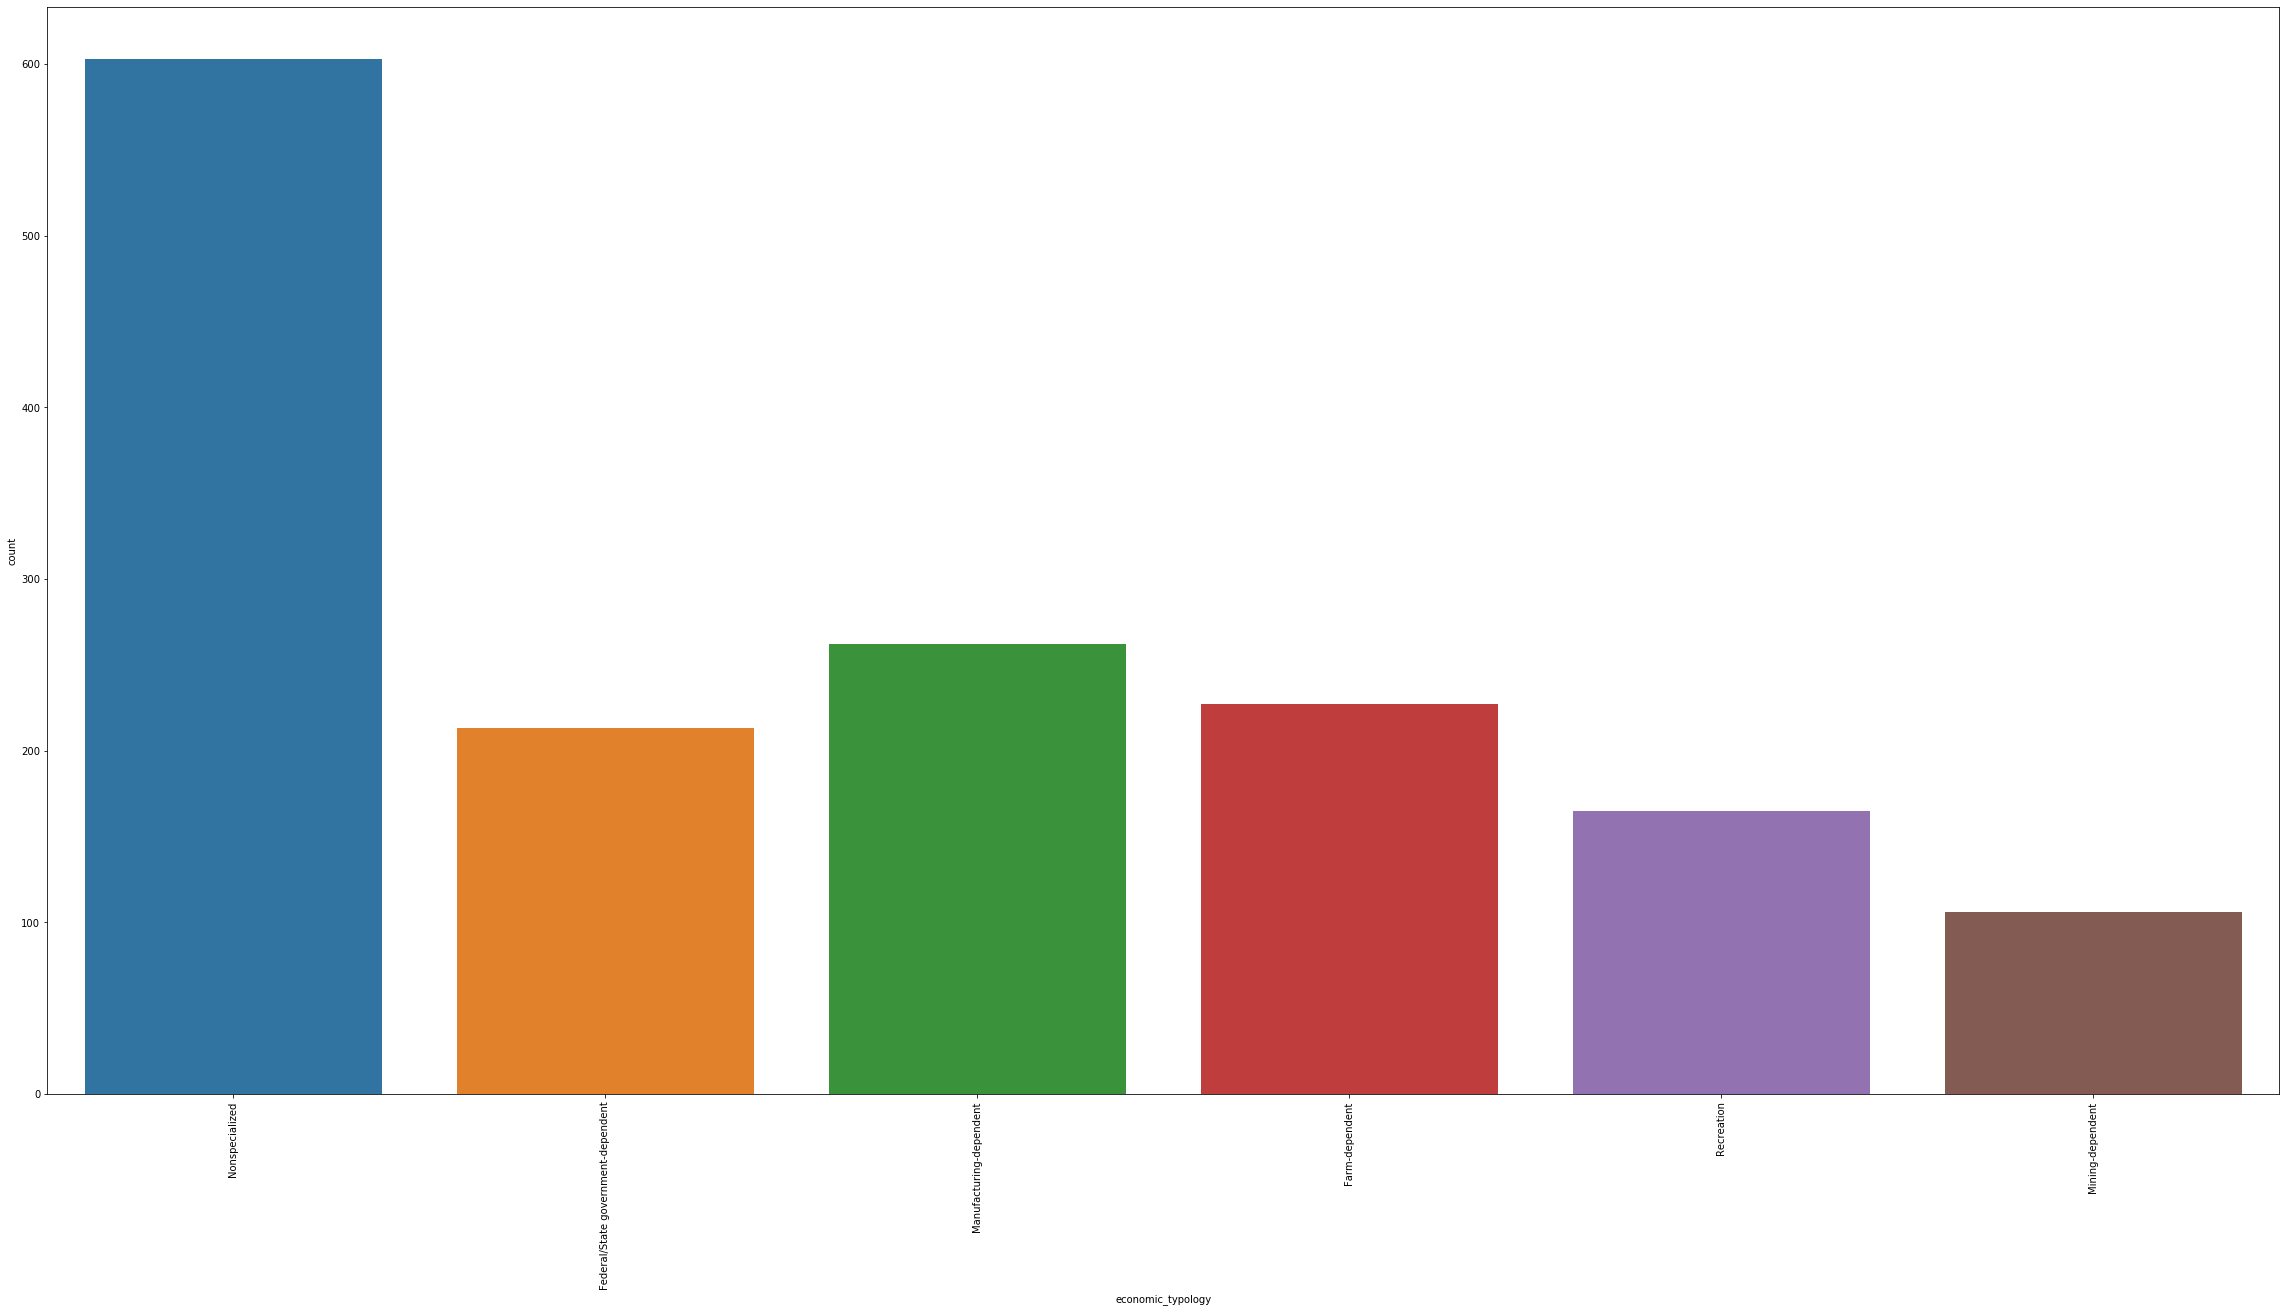

In [24]:
plt.figure(figsize=(40,20))
sns.countplot(x='economic_typology',data=df_cat)
plt.xticks(rotation=90)
plt.show()

### Save to a csv file

In [25]:
#df_cat.to_csv("testsetcategorical.csv", index=False)